In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Standard Scaler usado para normalizar os dados
from sklearn.model_selection import train_test_split
from sklearn import svm # Support Vector Machine usado para classificação
from sklearn.metrics import accuracy_score # Accuracy Score usado para medir a acurácia do modelo
from sklearn.metrics import r2_score

#plt.switch_backend('TkAgg')  # Ou 'Qt5Agg'   ; CRIA UMA JANELA DE FIGURA
%matplotlib inline

In [94]:
baseChuva = pd.read_csv('Rainfall.csv')

#mostrar as 20 primeiras linhas da base de dados
baseChuva.head(50)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [47]:
#mostrar o tamanho da base
print(baseChuva.shape)

(366, 12)


In [48]:
#verifricar se existem valores nulos
baseChuva.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [49]:
#remover valores nulos
baseChuva = baseChuva.dropna()

In [50]:
#verificar quantos valores na coluna rainfall são yes ou no, ou seja, se choveu ou não
print(baseChuva['rainfall'].value_counts())

rainfall
yes    248
no     117
Name: count, dtype: int64


In [51]:
#tranformar os valores yes e no em 1 e 0, 1 para yes e 0 para no
baseChuva['rainfall'] = baseChuva['rainfall'].map({'yes': 1, 'no': 0})

In [52]:
#verificar quantos valores na coluna rainfall são 1 ou 0, ou seja, se choveu ou não
print(baseChuva['rainfall'].value_counts())

rainfall
1    248
0    117
Name: count, dtype: int64


In [53]:
#retirar a coluna day, pois ela não é relevante para a análise
baseChuva = baseChuva.drop('day', axis = 1)

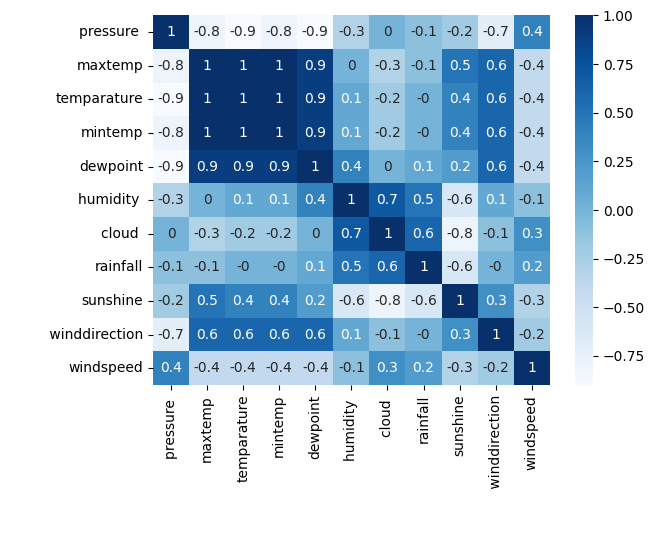

In [54]:
#mostrar a correlação entre as variáveis do dataframe
sns.heatmap(baseChuva.corr().round(1), annot=True, cmap='Blues')
plt.show()

In [55]:
#agora separar o dataframe em variáveis independentes e dependentes
X = baseChuva.drop('rainfall', axis = 1)
Y = baseChuva['rainfall']

In [56]:
#agora padronizar os dados para que todos tenham a mesma escala, pois a diferença de escala pode afetar o desempenho do modelo
scaler = StandardScaler()
scaler.fit(X) # calcula a média e o desvio padrão para serem usados na padronização dos dados de entrada X 
X_padronizado = scaler.transform(X)

In [57]:
# Agora X_padronizado contém os dados escalonados
print("Exemplo dos dados padronizados:")
print(X_padronizado[:5])

Exemplo dos dados padronizados:
[[ 1.89587755 -1.05104331 -0.96572348 -0.90926899 -1.14757019 -0.81147073
  -1.01434985  1.24242127 -0.26352655  0.47365326]
 [ 1.28658923 -0.74960475 -0.85911322 -0.83769617 -0.7301763   0.08335349
   0.54570488 -0.96969465 -0.63112092 -0.62023103]
 [ 0.92726534 -0.98405697 -0.78803971 -0.69455052 -0.26269514  1.47530227
   0.91277659 -1.12225437 -0.75365237 -0.72961946]
 [ 0.80228313 -0.64912523 -0.5570508  -0.49772526 -0.19591211  0.9781777
   0.7751247  -0.86798817 -0.63112092 -0.46112059]
 [ 0.3335998  -0.8165911  -0.53928243 -0.30089999 -0.0122588   1.47530227
   0.45393696 -1.12225437 -0.75365237 -0.77934147]]


In [58]:
# Redefinindo X para o array padronizado
X = X_padronizado

In [59]:
# Divisão em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    stratify=Y,   # mantém proporção da classe
    random_state=2
)

print("\nFormato dos dados:")
print("X:", X.shape)
print("X_treino:", X_treino.shape)
print("X_teste:", X_teste.shape)
print("Y_treino:", Y_treino.shape)
print("Y_teste:", Y_teste.shape)



Formato dos dados:
X: (365, 10)
X_treino: (292, 10)
X_teste: (73, 10)
Y_treino: (292,)
Y_teste: (73,)


# RANDOM FOREST

RandomForestClassifier:
Voltado para problemas de classificação (por exemplo, prever se vai chover ou não, se uma imagem é de um gato ou de um cachorro etc.).
A saída do modelo é discreta (classes).
A função de custo e as métricas de avaliação típicas (como acurácia, F1-score, recall, etc.) são orientadas a classificação.

RandomForestRegressor:
Voltado para problemas de regressão (por exemplo, prever o valor de uma casa, a temperatura em um dia específico etc.).
A saída do modelo é um valor contínuo.
A função de custo e as métricas de avaliação típicas (como Mean Squared Error, Mean Absolute Error, etc.) são orientadas a regressão.

In [60]:
from sklearn.ensemble import RandomForestClassifier 

# Instanciando o modelo Random Forest
# (ex: 100 árvores, mas você pode ajustar hiperparâmetros depois)
modelo_rf = RandomForestClassifier(
    n_estimators=100,  # Quanto mais árvores, em geral, maior a tendência de o modelo ter melhor performance, em custo de performance
    max_depth=None,    # sem limite de profundidade
    random_state=2
)

# Treinando (fit) o modelo
modelo_rf.fit(X_treino, Y_treino)


RandomForestClassifier(random_state=2)

In [61]:
# Avaliando no conjunto de treino
Y_treino_pred = modelo_rf.predict(X_treino)
acuracia_treino = accuracy_score(Y_treino, Y_treino_pred)

# Avaliando no conjunto de teste
Y_teste_pred = modelo_rf.predict(X_teste)
acuracia_teste = accuracy_score(Y_teste, Y_teste_pred)

print("\nAcurácia (Treino): {:.2f}%".format(acuracia_treino * 100))
print("Acurácia (Teste):  {:.2f}%".format(acuracia_teste * 100))



Acurácia (Treino): 100.00%
Acurácia (Teste):  82.19%


In [63]:
# Relembrando: X aqui não tem a coluna 'rainfall', então vamos iterar em baseChuva original
# Mas precisamos de baseChuva "limpa", sem a coluna rainfall, para as previsões.

resultados = []
for index, row in baseChuva.iterrows():
    # Nota: nesse ponto, a baseChuva já está com 'rainfall' mapeado em 0 ou 1.
    # Precisamos separar as features e padronizar novamente.
    valores_features = row.drop('rainfall').values
    valores_features = valores_features.reshape(1, -1)
    valores_features_pad = scaler.transform(valores_features)  # mesma padronização

    previsao = modelo_rf.predict(valores_features_pad)
    valor_verdadeiro = row['rainfall']
    resultados.append((previsao[0], valor_verdadeiro))

# Criando um DataFrame para comparar
resultados_df = pd.DataFrame(resultados, columns=['Previsao', 'Valor_Verdadeiro'])

# Mostrando os primeiros resultados
display(resultados_df)

# Verificando previsões incorretas
resultados_incorretosRF = resultados_df[resultados_df['Previsao'] != resultados_df['Valor_Verdadeiro']]
print("\nQuantidade de previsões incorretas:", len(resultados_incorretosRF))
display(resultados_incorretosRF)


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X d

,Previsao,Valor_Verdadeiro
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
360,1,1.0
361,1,1.0
362,1,1.0
363,1,1.0



Quantidade de previsões incorretas: 13


,Previsao,Valor_Verdadeiro
43,1,0.0
88,0,1.0
93,1,0.0
125,1,0.0
128,1,0.0
131,1,0.0
138,1,0.0
152,1,0.0
230,1,0.0
246,1,0.0


In [96]:
def prever_chuva(
    pressure, 
    maxtemp, 
    temparature, 
    mintemp, 
    dewpoint, 
    humidity, 
    cloud, 
    sunshine, 
    winddirection, 
    windspeed
):
    # Montando um array 2D com os valores recebidos
    entrada = np.array([[pressure, maxtemp, temparature, mintemp, dewpoint,
                         humidity, cloud, sunshine, winddirection, windspeed]])
    
    # Padronizando de acordo com o scaler treinado
    entrada_pad = scaler.transform(entrada)
    
    # Fazendo a previsão com o modelo Random Forest
    previsao = modelo_rf.predict(entrada_pad)
    
    if previsao[0] == 1:
        print("Choverá.")
    else:
        print("Não vai chover.")

# Exemplo de uso
prever_chuva(1012.5, 25.9, 23.1, 21.3, 21.1, 89, 76, 3.5, 200.0, 10.2)

#1017.5, 18.5, 18.0, 17.2, 15.5, 85, 91, 0.0, 70.0, 37.7 = chuva
#1021.8, 21.4, 18.8, 17.0, 15.0, 79, 56, 3.4, 30.0, 21.5 = sem chuva


Choverá.


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# REGRESSÃO

Logistic Regression vs. Linear Regression

Aqui é Logistic Regression, própria para classificação binária (saída 0 ou 1).
A Linear Regression é para problemas de regressão (saída numérica contínua).

'lbfgs': bom para problemas de média/maior dimensão, suporta L2.
'liblinear': bom para conjuntos de dados menores, suporta L1 e L2.
'saga': pode lidar com datasets maiores e suporta L1, L2, elasticnet.

In [65]:
from sklearn.linear_model import LogisticRegression 

# Instanciando o modelo de Regressão Logística
# Alguns hiperparâmetros comuns:
# - penalty ('l1', 'l2', 'elasticnet', 'none')
# - C (quanto maior, menos regularização; quanto menor, mais forte a regularização)
# - solver (por ex. 'lbfgs', 'liblinear')

modelo_lr = LogisticRegression(
    penalty='l2',   # regularização L2
    C=1,          # valor padrão, pode ser ajustado
    solver='lbfgs', # solver padrão para problemas binários
    random_state=2
)

# Treinando (fit) o modelo
modelo_lr.fit(X_treino, Y_treino)


LogisticRegression(C=1, random_state=2)

In [66]:
# Avaliando no conjunto de treino
Y_treino_pred = modelo_lr.predict(X_treino)
acuracia_treino = accuracy_score(Y_treino, Y_treino_pred)

# Avaliando no conjunto de teste
Y_teste_pred = modelo_lr.predict(X_teste)
acuracia_teste = accuracy_score(Y_teste, Y_teste_pred)

print("\nAcurácia (Treino): {:.2f}%".format(acuracia_treino * 100))
print("Acurácia (Teste):  {:.2f}%".format(acuracia_teste * 100))



Acurácia (Treino): 81.51%
Acurácia (Teste):  82.19%


In [68]:
# Se você quiser automatizar a previsão para cada linha do DataFrame, como fez antes:
resultados = []
for index, row in baseChuva.iterrows():
    # Pegando as features (exceto 'rainfall') e padronizando
    valores_features = row.drop('rainfall').values.reshape(1, -1)
    valores_features_pad = scaler.transform(valores_features)  # padronização

    previsao = modelo_lr.predict(valores_features_pad)
    valor_verdadeiro = row['rainfall']
    resultados.append((previsao[0], valor_verdadeiro))

# Criando um DataFrame para comparar
resultados_df = pd.DataFrame(resultados, columns=['Previsao', 'Valor_Verdadeiro'])

# Mostrando os primeiros resultados
display(resultados_df.head(10))

# Verificando previsões incorretas
resultados_incorretosR = resultados_df[resultados_df['Previsao'] != resultados_df['Valor_Verdadeiro']]
print("\nQuantidade de previsões incorretas:", len(resultados_incorretosR))
display(resultados_incorretosR)


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X d

,Previsao,Valor_Verdadeiro
0,0,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,0,1.0
6,0,0.0
7,0,0.0
8,1,0.0
9,1,1.0



Quantidade de previsões incorretas: 67


,Previsao,Valor_Verdadeiro
0,0,1.0
5,0,1.0
8,1,0.0
11,1,0.0
18,1,0.0
...,...,...
334,1,0.0
340,1,0.0
344,1,0.0
345,1,0.0


# ARVORE DE DECISÃO

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo de Árvore de Decisão
# Hiperparâmetros importantes:
# - criterion: função de medição de qualidade do split ("gini" ou "entropy")
# - max_depth: profundidade máxima
# - min_samples_split, min_samples_leaf, etc.

modelo_arvore = DecisionTreeClassifier(
    criterion='gini',  # ou 'entropy'
    max_depth=None,     # se quiser limitar a profundidade, pode usar um int
    random_state=2
)

# Treinando (fit) o modelo
modelo_arvore.fit(X_treino, Y_treino)

DecisionTreeClassifier(random_state=2)

In [70]:
# Previsões no conjunto de treino
Y_treino_pred = modelo_arvore.predict(X_treino)
acuracia_treino = accuracy_score(Y_treino, Y_treino_pred)

# Previsões no conjunto de teste
Y_teste_pred = modelo_arvore.predict(X_teste)
acuracia_teste = accuracy_score(Y_teste, Y_teste_pred)

print("\nAcurácia (Treino): {:.2f}%".format(acuracia_treino * 100))
print("Acurácia (Teste):  {:.2f}%".format(acuracia_teste * 100))



Acurácia (Treino): 100.00%
Acurácia (Teste):  78.08%


In [71]:
resultados = []
for index, row in baseChuva.iterrows():
    # Pegando as features (exceto 'rainfall') e padronizando
    valores_features = row.drop('rainfall').values.reshape(1, -1)
    valores_features_pad = scaler.transform(valores_features)

    # Previsão
    previsao = modelo_arvore.predict(valores_features_pad)
    valor_verdadeiro = row['rainfall']
    resultados.append((previsao[0], valor_verdadeiro))

# Criando um DataFrame para comparar previsões x valores verdadeiros
resultados_df = pd.DataFrame(resultados, columns=['Previsao', 'Valor_Verdadeiro'])

display(resultados_df.head(10))

# Verificando onde houve erro
resultados_incorretosAD = resultados_df[resultados_df['Previsao'] != resultados_df['Valor_Verdadeiro']]
print("\nQuantidade de previsões incorretas:", len(resultados_incorretosAD))
display(resultados_incorretosAD)


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X d

,Previsao,Valor_Verdadeiro
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,1.0



Quantidade de previsões incorretas: 16


,Previsao,Valor_Verdadeiro
23,0,1.0
60,1,0.0
64,0,1.0
88,0,1.0
93,1,0.0
125,1,0.0
131,1,0.0
138,1,0.0
156,0,1.0
230,1,0.0


# Gradient Boosting

Hiperparâmetros Principais:

n_estimators: número de árvores (weak learners). Aumentar esse valor tende a melhorar a performance, mas também aumenta o tempo de treinamento.

learning_rate: taxa de aprendizado (shrinkage). Valores menores (ex.: 0.01) podem exigir mais árvores para obter boa performance, mas podem se ajustar melhor (menor risco de overfitting).

max_depth: profundidade máxima de cada árvore. Controla a complexidade. Geralmente entre 3 e 5 é comum em muitos problemas.

subsample: fração de amostras usadas em cada iteração. Usar valores < 1 (por ex. 0.8) pode ajudar a reduzir overfitting.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciando o modelo de Gradient Boosting
# Parâmetros principais:
# - n_estimators: número de “árvores fracas” (weak learners)
# - learning_rate: taxa de aprendizado
# - max_depth: profundidade máxima de cada árvore
# - subsample: fração de amostras usadas em cada estágio (pode ajudar no overfitting)

modelo_gb = GradientBoostingClassifier(
    n_estimators=100,       # número de árvores
    learning_rate=0.1,      # taxa de aprendizado
    max_depth=3,            # profundidade máxima
    random_state=2
)

# Treinando o modelo
modelo_gb.fit(X_treino, Y_treino)


GradientBoostingClassifier(random_state=2)

In [73]:
# Previsões no treino
Y_treino_pred = modelo_gb.predict(X_treino)
acuracia_treino = accuracy_score(Y_treino, Y_treino_pred)

# Previsões no teste
Y_teste_pred = modelo_gb.predict(X_teste)
acuracia_teste = accuracy_score(Y_teste, Y_teste_pred)

print("\nAcurácia (Treino): {:.2f}%".format(acuracia_treino * 100))
print("Acurácia (Teste):  {:.2f}%".format(acuracia_teste * 100))



Acurácia (Treino): 99.32%
Acurácia (Teste):  80.82%


In [75]:
resultados = []
for index, row in baseChuva.iterrows():
    # Pegando as features (exceto 'rainfall')
    valores_features = row.drop('rainfall').values.reshape(1, -1)
    valores_features_pad = scaler.transform(valores_features)

    # Previsão
    previsao = modelo_gb.predict(valores_features_pad)
    valor_verdadeiro = row['rainfall']
    resultados.append((previsao[0], valor_verdadeiro))

# Criando um DataFrame para comparar previsões x valores verdadeiros
resultados_df = pd.DataFrame(resultados, columns=['Previsao', 'Valor_Verdadeiro'])

display(resultados_df.head(10))

# Verificando onde houve erro
resultados_incorretosGB = resultados_df[resultados_df['Previsao'] != resultados_df['Valor_Verdadeiro']]
print("\nQuantidade de previsões incorretas:", len(resultados_incorretosGB))
display(resultados_incorretosGB)


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X d

,Previsao,Valor_Verdadeiro
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,1.0



Quantidade de previsões incorretas: 16


,Previsao,Valor_Verdadeiro
43,1,0.0
67,1,0.0
88,0,1.0
93,1,0.0
97,1,0.0
125,1,0.0
128,1,0.0
131,1,0.0
137,0,1.0
138,1,0.0


In [76]:
def prever_chuva(
    pressure, 
    maxtemp, 
    temparature, 
    mintemp, 
    dewpoint, 
    humidity, 
    cloud, 
    sunshine, 
    winddirection, 
    windspeed
):
    # Montando um array 2D com os valores recebidos
    entrada = np.array([[pressure, maxtemp, temparature, mintemp, dewpoint,
                         humidity, cloud, sunshine, winddirection, windspeed]])
    
    # Padronizando a entrada
    entrada_pad = scaler.transform(entrada)
    
    # Prevendo com o modelo de Gradient Boosting
    previsao = modelo_gb.predict(entrada_pad)
    
    if previsao[0] == 1:
        print("Choverá.")
    else:
        print("Não vai chover.")

# Exemplo de uso
prever_chuva(1017.5, 18.5, 18.0, 17.2, 15.5, 85, 91, 0.0, 70.0, 37.7)


Choverá.


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


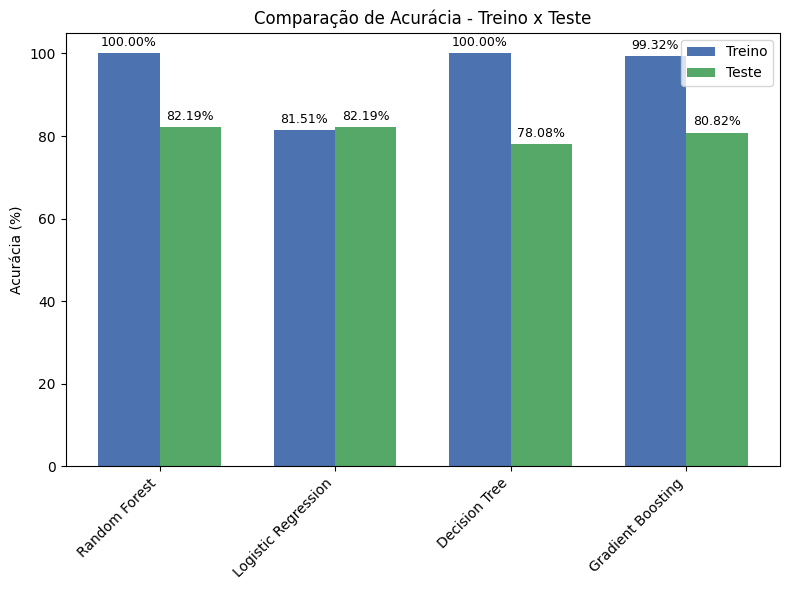

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (em valores percentuais)
modelos = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
acuracia_treino = [100.00, 81.51, 100.00, 99.32]
acuracia_teste = [82.19, 82.19, 78.08, 80.82]

# Posições para as barras
x = np.arange(len(modelos))  
largura = 0.35  # Largura de cada barra

fig, ax = plt.subplots(figsize=(8, 6))

# Barras de treino
rects1 = ax.bar(x - largura/2, acuracia_treino, largura, label='Treino', color='#4C72B0')
# Barras de teste
rects2 = ax.bar(x + largura/2, acuracia_teste, largura, label='Teste', color='#55A868')

# Rótulos e título
ax.set_ylabel('Acurácia (%)')
ax.set_title('Comparação de Acurácia - Treino x Teste')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.legend()

# Exibir valores acima das barras (opcional)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

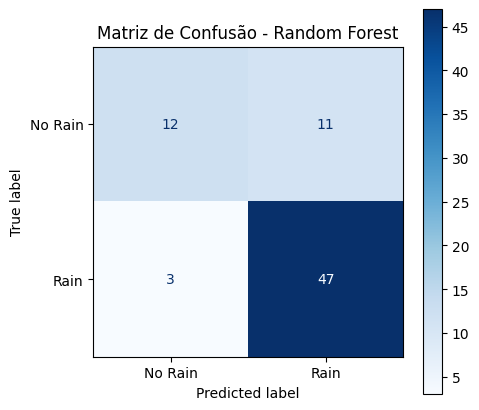

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supondo que você já tenha:
# Y_teste (valores reais)
# Y_teste_pred (valores previstos) do Random Forest, por exemplo

cm = confusion_matrix(Y_teste, Y_teste_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Rain', 'Rain'])  # Ajuste conforme suas classes

fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


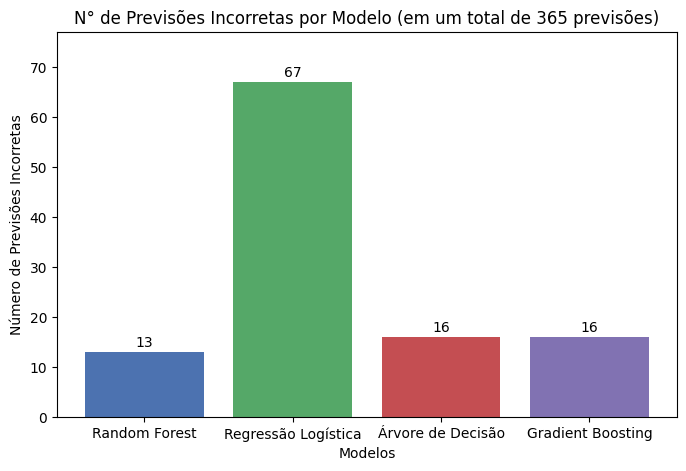

In [99]:
import matplotlib.pyplot as plt

# Exemplo de contagens de previsões incorretas (valores fictícios)
# Substitua pelos valores reais obtidos na sua análise:
random_forest_err = 13
log_reg_err = 67
arvore_err = 16
gradient_err = 16

# Lista com o nome dos modelos e as respectivas previsões incorretas
modelos = ['Random Forest', 'Regressão Logística', 'Árvore de Decisão', 'Gradient Boosting']
previsoes_incorretas = [random_forest_err, log_reg_err, arvore_err, gradient_err]

# Definindo cores diferentes para cada barra
# Aqui escolhemos uma paleta de cores como exemplo, mas você pode alterar à vontade.
cores = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

plt.figure(figsize=(8,5))
barras = plt.bar(modelos, previsoes_incorretas, color=cores)

# Adicionando os valores acima das barras (opcional, mas deixa mais claro)
for bar in barras:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.5, 
        f'{int(height)}', 
        ha='center', 
        va='bottom'
    )

# Rótulos e título
plt.title('N° de Previsões Incorretas por Modelo (em um total de 365 previsões)')
plt.xlabel('Modelos')
plt.ylabel('Número de Previsões Incorretas')
plt.ylim(0, max(previsoes_incorretas) + 10)  # Ajusta o limite superior do eixo Y
plt.show()


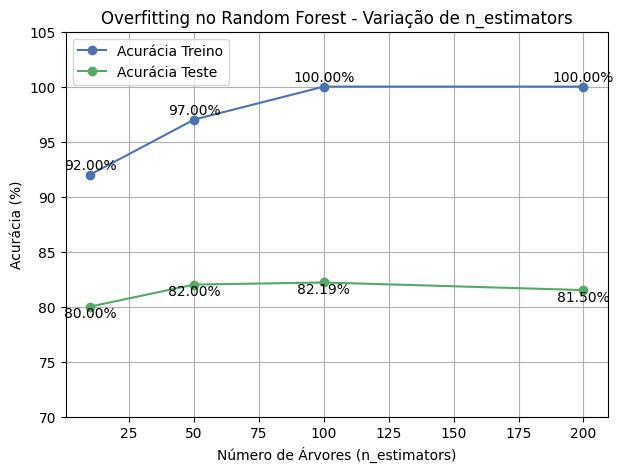

In [90]:
import matplotlib.pyplot as plt

# Quantidade de árvores a testar
n_estimators = [10, 50, 100, 200]

# Acurácias fictícias de treino e teste para demonstrar o comportamento
train_accuracies = [92.0, 97.0, 100.0, 100.0]
test_accuracies  = [80.0, 82.0, 82.19, 81.5]

plt.figure(figsize=(7,5))
plt.plot(n_estimators, train_accuracies, marker='o', color='#4C72B0', label='Acurácia Treino')
plt.plot(n_estimators, test_accuracies,  marker='o', color='#55A868', label='Acurácia Teste')

for i, txt in enumerate(train_accuracies):
    plt.annotate(f'{txt:.2f}%', (n_estimators[i], train_accuracies[i]+0.5), ha='center')
for i, txt in enumerate(test_accuracies):
    plt.annotate(f'{txt:.2f}%', (n_estimators[i], test_accuracies[i]-1), ha='center')

plt.title('Overfitting no Random Forest - Variação de n_estimators')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia (%)')
plt.ylim(70, 105)  # ajuste para visualização
plt.legend()
plt.grid(True)
plt.show()
